<a href="https://colab.research.google.com/github/Mashhoodaliyusuf/Loan-Status-Prediction/blob/main/DevTown_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Status Prediction Data Science Project

In [ ]:
# Importing Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
enc = LabelEncoder()

In [ ]:
# Importing Data
data = pd.read_csv('/content/drive/MyDrive/DevtownProject/Training Data.csv')

# EDA

In [ ]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.shape

(614, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Since Loan_ID is of no use, we are dropping it
data.drop('Loan_ID', axis=1,  inplace=True)

In [ ]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


**Working with Gender Column**

In [ ]:
# Working with Gender
data[data.Gender.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [ ]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
# Since there is no relation of Gender with any other Column in this data. So there is no way we can decide
# the gender. Hence we are converting NAN data ito FEMALE. This will make our data more balanced.

In [ ]:
data['Gender'] = data['Gender'].fillna('Female')

In [ ]:
data.Gender.value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [ ]:
data[data.Gender.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
data['Gender'] = enc.fit_transform(data['Gender'])

In [ ]:
data.Gender.value_counts()

1    489
0    125
Name: Gender, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


**Working with Married Column**

In [ ]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
data[data.Married.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [ ]:
data.Married = data.Married.fillna('Yes')

In [ ]:
data.Married = enc.fit_transform(data.Married)

In [ ]:
data.Married.value_counts()

1    401
0    213
Name: Married, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


**Working with Dependents**

In [ ]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data[data.Dependents.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,1,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,1,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,1,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,1,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,1,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,0,0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,1,1,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,1,0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,1,1,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,1,1,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [ ]:
# Those who are married, we can assign Dependents as yes and those who are not married, we can assign them as no ependents
data.loc[(data.Dependents.isna()) & (data.Married==0)] = data.loc[(data.Dependents.isna()) & (data.Married==0)].fillna('0')
data.loc[(data.Dependents.isna()) & (data.Married==1)] = data.loc[(data.Dependents.isna()) & (data.Married==1)].fillna('1')

In [ ]:
data.Dependents.value_counts()

0     349
1     113
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data.replace({'Dependents' : { '2' : '1+', '3+' : '1+'}}, inplace=True)

In [ ]:
data.Dependents.value_counts()

0     349
1+    152
1     113
Name: Dependents, dtype: int64

In [ ]:
data.Dependents = enc.fit_transform(data.Dependents)

In [ ]:
data.Dependents.value_counts()

0    349
2    152
1    113
Name: Dependents, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         594 non-null    object 
 8   Loan_Amount_Term   601 non-null    object 
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 57.7+ KB


**Working with Education**

In [ ]:
data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
data.Education = enc.fit_transform(data.Education)

In [ ]:
data.Education.value_counts()

0    480
1    134
Name: Education, dtype: int64

**Working with Self_Employed**

In [ ]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
data[data.Self_Employed.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,1,1,2,0,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,1,1,0,0,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,1,1,1,0,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,0,0,2,0,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,1,1,1,0,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,1,0,0,0,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,1,0,0,1,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,0,1,0,0,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,1,0,0,0,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,1,0,0,0,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [ ]:
data.Self_Employed = data.Self_Employed.fillna('Yes')

In [ ]:
data.Self_Employed = enc.fit_transform(data.Self_Employed)

In [ ]:
data.Self_Employed.value_counts()

0    500
1    114
Name: Self_Employed, dtype: int64

**Working with ApplicantIncome**

In [ ]:
data.ApplicantIncome.nlargest(10)

409    81000
333    63337
171    51763
155    39999
185    39147
443    37719
183    33846
126    23803
506    20833
284    20667
Name: ApplicantIncome, dtype: int64

In [ ]:
data.ApplicantIncome.nsmallest(10)

216     150
468     210
600     416
500     645
188     674
77     1000
418    1025
530    1025
14     1299
82     1378
Name: ApplicantIncome, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         594 non-null    object 
 8   Loan_Amount_Term   601 non-null    object 
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 57.7+ KB


**Working with CoapplicantIncome**

In [ ]:
data.CoapplicantIncome.nlargest(5)

600    41667.0
581    33837.0
402    20000.0
417    20000.0
177    11300.0
Name: CoapplicantIncome, dtype: float64

In [ ]:
data.CoapplicantIncome.nsmallest(5)

0     0.0
2     0.0
4     0.0
15    0.0
16    0.0
Name: CoapplicantIncome, dtype: float64

In [ ]:
data.CoapplicantIncome = data.CoapplicantIncome.astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         594 non-null    object 
 8   Loan_Amount_Term   601 non-null    object 
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 57.7+ KB


**Working with LoanAmount**

In [ ]:
data[data.LoanAmount.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,NaN,360.0,1.0,Urban,Y
35,1,1,0,0,0,2275,2067,NaN,360.0,1.0,Urban,Y
63,1,1,1,0,0,4945,0,NaN,360.0,0.0,Rural,N
81,1,1,1,0,1,2395,0,NaN,360.0,1.0,Semiurban,Y
95,1,0,0,0,1,6782,0,NaN,360.0,NaN,Urban,N
103,1,1,0,0,0,4652,3583,NaN,360.0,1.0,Semiurban,Y
113,0,0,1,0,1,7451,0,NaN,360.0,1.0,Semiurban,Y
127,1,0,0,0,0,3865,1640,NaN,360.0,1.0,Rural,Y
202,1,1,2,1,0,3992,0,NaN,180.0,1.0,Urban,N
284,1,1,0,0,0,20667,0,NaN,360.0,1.0,Rural,N


In [ ]:
# We will check mean, median and Mode for the Loan amount to fill NAN
data[data.LoanAmount.notnull()].LoanAmount.astype('int').mean()

145.92255892255892

In [ ]:
data[data.LoanAmount.notnull()].LoanAmount.astype('int').median()

127.5

In [ ]:
data[data.LoanAmount.notnull()].LoanAmount.astype('int').mode()

0    120
dtype: int64

In [ ]:
data.LoanAmount = data.LoanAmount.fillna(data[data.LoanAmount.notnull()].LoanAmount.astype('int').median())

In [ ]:
data[data.LoanAmount.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
data.LoanAmount = data.LoanAmount.astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   601 non-null    object 
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 57.7+ KB


**Working with Loan_Amount_Term**

In [ ]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
1          1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data[data.Loan_Amount_Term.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,1,1,0,0,1,2600,3500,115,NaN,1.0,Urban,Y
36,1,1,0,0,0,1828,1330,100,NaN,0.0,Urban,N
44,1,1,0,1,1,4695,0,96,NaN,1.0,Urban,Y
45,0,0,0,0,0,3410,0,88,NaN,1.0,Urban,Y
73,1,1,2,1,0,4755,0,95,NaN,0.0,Semiurban,N
112,1,1,0,1,0,3572,4114,152,NaN,0.0,Rural,N
165,1,1,0,0,0,3707,3166,182,NaN,1.0,Rural,Y
197,0,0,0,1,0,1907,2365,120,NaN,1.0,Urban,Y
223,1,1,0,0,0,7578,1010,175,NaN,1.0,Semiurban,Y
232,1,0,0,1,0,3189,2598,120,NaN,1.0,Rural,Y


In [ ]:
data[data.Loan_Amount_Term.notnull()].Loan_Amount_Term.astype('int').mean()

341.43261231281195

In [ ]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data[data.Loan_Amount_Term.notnull()].Loan_Amount_Term.astype('int').mean())

In [ ]:
data.Loan_Amount_Term = data.Loan_Amount_Term.astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 57.7+ KB


**Working with Credit_History**

In [ ]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data[data.Credit_History.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,1,0,1,1,0,3596,0,100,240,NaN,Urban,Y
24,1,1,1,0,1,3717,2925,151,360,NaN,Semiurban,N
30,1,1,1,0,1,4166,3369,201,360,NaN,Urban,N
42,1,1,0,0,0,2400,0,75,360,NaN,Urban,Y
79,1,1,2,1,1,3333,2166,130,360,NaN,Semiurban,Y
83,1,1,0,0,0,6000,2250,265,360,NaN,Semiurban,N
86,1,1,2,1,0,3333,2000,99,360,NaN,Semiurban,Y
95,1,0,0,0,1,6782,0,127,360,NaN,Urban,N
117,1,1,1,0,0,2214,1398,85,360,NaN,Urban,Y
125,0,0,0,0,0,3692,0,93,360,NaN,Rural,Y


In [ ]:
data.Credit_History = data.Credit_History.fillna(0.0)

In [ ]:
data.Credit_History = data.Credit_History.astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    int64 
 1   Married            614 non-null    int64 
 2   Dependents         614 non-null    int64 
 3   Education          614 non-null    int64 
 4   Self_Employed      614 non-null    int64 
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int64 
 7   LoanAmount         614 non-null    int64 
 8   Loan_Amount_Term   614 non-null    int64 
 9   Credit_History     614 non-null    int64 
 10  Property_Area      614 non-null    object
 11  Loan_Status        614 non-null    object
dtypes: int64(10), object(2)
memory usage: 57.7+ KB


**Working with Property_Area**

In [ ]:
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
data.Property_Area = enc.fit_transform(data.Property_Area)

In [ ]:
data.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    int64 
 1   Married            614 non-null    int64 
 2   Dependents         614 non-null    int64 
 3   Education          614 non-null    int64 
 4   Self_Employed      614 non-null    int64 
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int64 
 7   LoanAmount         614 non-null    int64 
 8   Loan_Amount_Term   614 non-null    int64 
 9   Credit_History     614 non-null    int64 
 10  Property_Area      614 non-null    int64 
 11  Loan_Status        614 non-null    object
dtypes: int64(11), object(1)
memory usage: 57.7+ KB


**Working with Loan_Status**

In [ ]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
data.Loan_Status = enc.fit_transform(data.Loan_Status)

In [ ]:
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Cleaned Data

In [ ]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,127,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1


# Working with Test Data Applying same process as above

In [ ]:
testdata = pd.read_csv('/content/drive/MyDrive/DevtownProject/Testing Data.csv')

In [ ]:
testdata.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
testdata.shape

(367, 12)

In [ ]:
testdata.drop('Loan_ID', axis=1,  inplace=True)

In [ ]:
testdata[testdata.Gender.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [ ]:
testdata.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
testdata.Gender = testdata.Gender.fillna('Female')

In [ ]:
testdata.Gender = enc.fit_transform(testdata.Gender)

In [ ]:
testdata.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [ ]:
testdata.Married = enc.fit_transform(testdata.Married)

In [ ]:
testdata.Married.value_counts()

1    233
0    134
Name: Married, dtype: int64

In [ ]:
testdata.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
testdata[testdata.Dependents.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1,1,NaN,Not Graduate,No,4163,1475,162.0,360.0,1.0,Urban
70,0,0,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
111,1,1,NaN,Graduate,No,4082,0,93.0,360.0,1.0,Semiurban
138,0,0,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
202,1,1,NaN,Graduate,No,3016,1300,100.0,360.0,NaN,Urban
247,1,1,NaN,Graduate,No,10000,0,NaN,360.0,1.0,Urban
251,1,1,NaN,Graduate,No,3863,0,70.0,300.0,1.0,Semiurban
265,1,0,NaN,Graduate,No,3579,3308,138.0,360.0,NaN,Semiurban
302,0,0,NaN,Graduate,Yes,14987,0,177.0,360.0,1.0,Rural
312,1,0,NaN,Graduate,No,2066,2108,104.0,84.0,1.0,Urban


In [ ]:
testdata.loc[(testdata.Dependents.isna()) & (testdata.Married==0)] = testdata.loc[(testdata.Dependents.isna()) & (testdata.Married==0)].fillna('0')
testdata.loc[(testdata.Dependents.isna()) & (testdata.Married==1)] = testdata.loc[(testdata.Dependents.isna()) & (testdata.Married==1)].fillna('1')

In [ ]:
testdata.Dependents.value_counts()

0     205
1      63
2      59
3+     40
Name: Dependents, dtype: int64

In [ ]:
testdata.replace({'Dependents' : { '2' : '1+', '3+' : '1+'}}, inplace=True)

In [ ]:
testdata.Dependents.value_counts()

0     205
1+     99
1      63
Name: Dependents, dtype: int64

In [ ]:
testdata.Dependents = enc.fit_transform(testdata.Dependents)

In [ ]:
testdata.Dependents.value_counts()

0    205
2     99
1     63
Name: Dependents, dtype: int64

In [ ]:
testdata.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [ ]:
testdata.Education = enc.fit_transform(testdata.Education)

In [ ]:
testdata.Education.value_counts()

0    283
1     84
Name: Education, dtype: int64

In [ ]:
testdata.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
testdata[testdata.Self_Employed.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,1,1,2,0,NaN,13633,0,280.0,240.0,1.0,Urban
11,1,1,1,0,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,1,1,2,0,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,1,1,2,0,NaN,7350,4029,185.0,180.0,1.0,Urban
72,1,1,1,0,NaN,4083,1775,139.0,60.0,1.0,Urban
89,0,0,0,0,NaN,5058,0,200.0,360.0,1.0,Rural
142,1,1,2,1,NaN,6794,528,139.0,360.0,0.0,Urban
161,1,0,0,0,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,0,1,2,0,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,1,1,2,0,NaN,4912,4614,160.0,360.0,1.0,Rural


In [ ]:
testdata.Self_Employed = testdata.Self_Employed.fillna('Yes')
testdata.Self_Employed = enc.fit_transform(testdata.Self_Employed)

In [ ]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata[testdata.LoanAmount.notnull()].LoanAmount.astype('int').median())
testdata.LoanAmount = testdata.LoanAmount.astype('int')

In [ ]:
testdata.Loan_Amount_Term = testdata.Loan_Amount_Term.fillna(testdata[testdata.Loan_Amount_Term.notnull()].Loan_Amount_Term.astype('int').mean())
testdata.Loan_Amount_Term = testdata.Loan_Amount_Term.astype('int')

In [ ]:
testdata.Credit_History = testdata.Credit_History.fillna(0.0)
testdata.Credit_History = testdata.Credit_History.astype('int')

In [ ]:
testdata.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [ ]:
testdata.Property_Area = enc.fit_transform(testdata.Property_Area)

In [ ]:
testdata.Property_Area.value_counts()

2    140
1    116
0    111
Name: Property_Area, dtype: int64

In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             367 non-null    int64
 1   Married            367 non-null    int64
 2   Dependents         367 non-null    int64
 3   Education          367 non-null    int64
 4   Self_Employed      367 non-null    int64
 5   ApplicantIncome    367 non-null    int64
 6   CoapplicantIncome  367 non-null    int64
 7   LoanAmount         367 non-null    int64
 8   Loan_Amount_Term   367 non-null    int64
 9   Credit_History     367 non-null    int64
 10  Property_Area      367 non-null    int64
dtypes: int64(11)
memory usage: 31.7 KB


# Cleaned Test Data

In [ ]:
 testdata.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110,360,1,2
1,1,1,1,0,0,3076,1500,126,360,1,2


# MACHINE LEARNING

In [ ]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336818,0.162355,0.061497,-0.039440,0.013933,0.082316,0.066449,-0.072876,0.035780,-0.017054,0.025407
Married,0.336818,1.000000,0.371420,0.012304,-0.021584,0.051708,0.075947,0.142275,-0.104762,-0.018150,0.004257,0.091478
Dependents,0.162355,0.371420,1.000000,0.056004,0.052463,0.091056,0.021677,0.140137,-0.091187,-0.011973,0.020541,0.018295
Education,0.061497,0.012304,0.056004,1.000000,-0.019059,-0.140760,-0.062290,-0.165485,-0.071263,-0.081637,-0.065243,-0.085884
Self_Employed,-0.039440,-0.021584,0.052463,-0.019059,1.000000,0.121356,0.028834,0.113890,-0.057012,-0.001923,-0.022732,0.005857
ApplicantIncome,0.013933,0.051708,0.091056,-0.140760,0.121356,1.000000,-0.116604,0.557340,-0.044307,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.082316,0.075947,0.021677,-0.062290,0.028834,-0.116604,1.000000,0.191089,-0.066629,-0.058796,0.010521,-0.059188
LoanAmount,0.066449,0.142275,0.140137,-0.165485,0.113890,0.557340,0.191089,1.000000,0.048940,-0.036936,-0.049368,-0.036162
Loan_Amount_Term,-0.072876,-0.104762,-0.091187,-0.071263,-0.057012,-0.044307,-0.066629,0.048940,1.000000,0.000938,-0.075582,-0.026103
Credit_History,0.035780,-0.018150,-0.011973,-0.081637,-0.001923,0.006986,-0.058796,-0.036936,0.000938,1.000000,-0.018761,0.432616


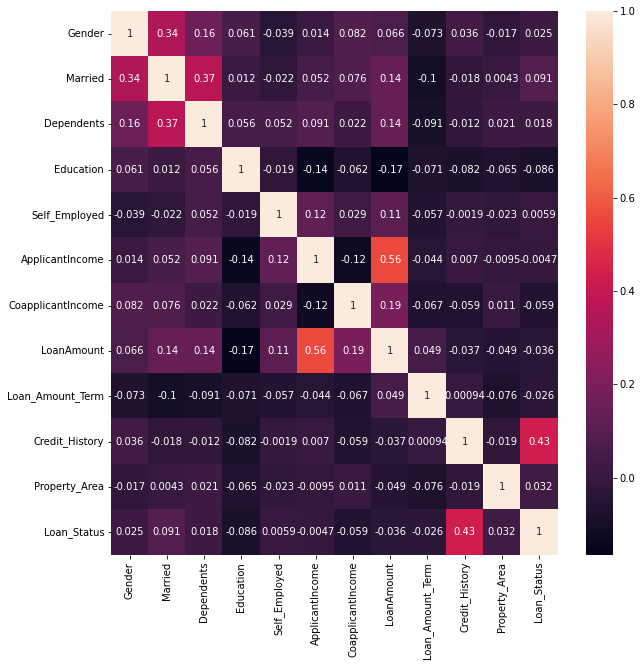

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
lr = LogisticRegression()
dt =  DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
X = data.drop('Loan_Status', axis=1)
y =  data.Loan_Status

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

**Training the Model**

In [ ]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RandomForestClassifier()

**Testing the Model**

In [ ]:
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)

In [ ]:
final = pd.DataFrame({"Actual":y_test,"LR":lr_y_pred,"DT":dt_y_pred,"RF":rf_y_pred})

In [ ]:
final.head(20)

,Actual,LR,DT,RF
193,1,1,0,1
334,1,1,1,1
343,1,1,1,1
24,0,0,1,0
47,1,1,1,1
277,1,1,1,1
76,0,1,1,1
547,1,1,1,1
135,0,1,0,1
213,1,1,0,1


# Performance Checking - Confusion Matrix

In [ ]:
# Confusion matrix LR
confusion_matrix(y_test, lr_y_pred)

array([[10, 17],
       [ 2, 64]])

In [ ]:
# Accuracy = (10+64)/(10+64+2+17) = 0.79 = 79%

In [ ]:
# Confusion matrix DT
confusion_matrix(y_test, dt_y_pred)

array([[11, 16],
       [13, 53]])

In [ ]:
# Accuracy = (11+48)/(11+48+18+16) = 0.63 = 63%

In [ ]:
# Confusion matrix RF
confusion_matrix(y_test, rf_y_pred)

array([[ 9, 18],
       [ 6, 60]])

In [ ]:
# Accuracy = (9+60)/(9+60+6+18) = 0.74 =74%

**Accuracy : LR > RF > DT**

**Here we can see that Logistic Regression giving comparatively better Accuracy of 73%, so we will go with that. Also 73% accuracy is not good but since we have small data and data were not not balanced.**

# Final Prediction of Given Test Data According to Highest Accuracy Model

In [ ]:
prediction = lr.predict(testdata)

In [ ]:
testdata['Predicted_Loan_Status'] = prediction

In [ ]:
testdata.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,1,1,0,0,0,5720,0,110,360,1,2,1
1,1,1,1,0,0,3076,1500,126,360,1,2,1
2,1,1,2,0,0,5000,1800,208,360,1,2,1
3,1,1,2,0,0,2340,2546,100,360,0,2,0
4,1,0,0,1,0,3276,0,78,360,1,2,1
5,1,1,0,1,1,2165,3422,152,360,1,2,1
6,0,0,1,1,0,2226,0,59,360,1,1,1
7,1,1,2,1,0,3881,0,147,360,0,0,0
8,1,1,2,0,1,13633,0,280,240,1,2,1
9,1,0,0,1,0,2400,2400,123,360,1,1,1


# Questions & Answers

**1. What's the ratio of Male to Female?**

In [ ]:
M = data[data.Gender==1].Gender.count()
F = data[data.Gender==0].Gender.count()

In [ ]:
print('Ratio M : F = ', M , ':', F)

Ratio M : F =  489 : 125


**2. How many Males are married and non-married?**

In [ ]:
Males_MRD = data[(data.Gender==1) & (data.Married==1)].Gender.count()
Males_NMRD = data[(data.Gender==1) & (data.Married==0)].Gender.count()

In [ ]:
# No of Males Married is :
Males_MRD

359

In [ ]:
# No of Males Non-Married is :
Males_NMRD

130

**3. How many Females are married and non-married?**

In [ ]:
Females_MRD = data[(data.Gender==0) & (data.Married==1)].Gender.count()
Females_NMRD = data[(data.Gender==0) & (data.Married==0)].Gender.count()

In [ ]:
# No of Females Married is :
Females_MRD

42

In [ ]:
# No of Females Non-Married is :
Females_NMRD

83

**4. How many Males and Females are graduated and non-graduated with respect to their Marital status?**

In [ ]:
MarriedGraduated = data[(data.Education==0) & (data.Married==1)].Gender.count()
MarriedNotGraduated = data[(data.Education==1) & (data.Married==1)].Gender.count()
UnmarriedGraduated = data[(data.Education==0) & (data.Married==0)].Gender.count()
UnmarriedNotGraduated = data[(data.Education==1) & (data.Married==0)].Gender.count()

In [ ]:
# Married And Graduated
MarriedGraduated

312

In [ ]:
# Married And Not-Graduated
MarriedNotGraduated

89

In [ ]:
# Unmarried And Graduated
UnmarriedGraduated

168

In [ ]:
# Unmarried And Not-Graduated
UnmarriedNotGraduated

45

**5. Which type of encoding will be required to perform on the "Education" column?**

In [ ]:
# We have used Label Encoding in Education column because categories are small just 2

**6. Is it a male or a female whose loan amount is the highest?**

In [ ]:
data[data.Gender==1].LoanAmount.max()

650

In [ ]:
data[data.Gender==0].LoanAmount.max()

700

In [ ]:
# Clearly, its female whos LoanAmount is highest

**7. the specification and information about the applicant who has the highest income?**

In [ ]:
data[data.ApplicantIncome == data.ApplicantIncome.max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,1,1,2,0,0,81000,0,360,360,0,0,0


**8. What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)**

In [ ]:
# We have considered all the features in the data given except LoanID
# Because every given features except LoanID is very crucial to decide the outcome result

**9. Which model are you going to choose and define the reason for going with the same model?**

In [ ]:
# Since the problem  is of classification type. Therefore we have to go with classifier models. Out of all other,
# we have seen above the Logistic Regession model has given us better accuracy. So we have choosen LR as our mode

**. 10 . Have you performed the Hyper Parameter Tuning?**

In [ ]:
# No, didn't feel the need for this. But could have been considered

**11. Compare the Actual results with the Predicted results**

In [ ]:
final

,Actual,LR,DT,RF
193,1,1,0,1
334,1,1,1,1
343,1,1,1,1
24,0,0,1,0
47,1,1,1,1
...,...,...,...,...
507,0,1,1,1
344,1,1,1,1
339,1,1,0,1
141,1,1,0,1


**12. What's the accuracy of your model?**

In [ ]:
# Confusion matrix LR
confusion_matrix(y_test, lr_y_pred)

array([[10, 17],
       [ 2, 64]])

In [ ]:
# Accuracy = (10+64)/(10+64+2+17) = 0.79 = 79%
# With Logistic Regression, we got 79% Accuracy

**. 13. In order to improve the accuracy, what more approaches can be done?**

In [ ]:
# First data should be large because we hve lots of columns
# Second the data should be more balanced

**14. What can you conclude with respect to the data?**


In [ ]:
# From data and its visualization, we can conclude that those who have highest Income and have
# good credit history gets more chance to approved for the Loan

In [ ]:
data.nlargest(5, ['LoanAmount'])

# Pickling the Model

In [ ]:
import pickle
saved_model = pickle.dumps(lr)